In [236]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import scipy.io


In [237]:
#fonction euler
def euler(xt0_CI, yt0_CI, rho, n, epsilon = 0, beta = 8/3, sigma = 10, dt = 0.001):

    #initialiser les dictionnaires de valeurs
    t = np.linspace(0.0, n * dt, n + 1)
    x = np.empty(n + 1)
    y = np.empty(n + 1)
    z = np.empty(n + 1)

    #conditions initiales
    eta = np.sqrt(beta * (rho - 1))
    x[0] = eta + epsilon + xt0_CI
    y[0] = eta + yt0_CI
    z[0] = rho - 1

    #boucle d'euler pour tous les temps
    for i in range(n):
        x[i+1] = x[i] + dt * sigma * (y[i] - x[i])
        y[i+1] = y[i] + dt * (x[i] * (rho - z[i]) - y[i])
        z[i+1] = z[i] + dt * (x[i] * y[i] - beta * z[i])

    return t, x, y, z

In [238]:
#fonctions graphique
def graph_controle(t, x, y, z):
    fig, axs = plt.subplots(3,1, figsize = (10,10))
    ax, ax2, ax3 = axs

    ax.plot(t, x, label='x')
    ax.plot(t, y, label='y')
    ax.plot(t, z, label='z')
    ax.set_xlabel('Temps (s)')
    ax.set_ylabel('Valeur des variables')

    ax2.plot(y, x)
    ax2.set_xlabel('Valeur de y')
    ax2.set_ylabel('Valeur de x')

    ax3.plot(z, x)
    ax3.set_xlabel('Valeur de z')
    ax3.set_ylabel('Valeur de x')

    ax.legend()
    plt.show()
    return fig

def graph_perturbee(t, x, y, z, x2, y2, z2):
    fig, axs = plt.subplots(3,1, figsize = (10,10))
    ax, ax2, ax3 = axs

    ax.plot(t, x, label='x contrôle')
    ax.plot(t, x2, label='x perturbée')
    ax.set_xlabel('Temps (s)')
    ax.set_ylabel('Valeur de x')

    ax2.plot(t, y, label='y contrôle')
    ax2.plot(t, y2, label='y perturbée')
    ax2.set_xlabel('Temps (s)')
    ax2.set_ylabel('Valeur de y')

    ax3.plot(t, z, label='z contrôle')
    ax3.plot(t, z2, label='z perturbée')
    ax3.set_xlabel('Temps (s)')
    ax3.set_ylabel('Valeur de z')

    ax.legend()
    ax2.legend()
    ax3.legend(loc = "lower left")

    plt.show()
    return fig

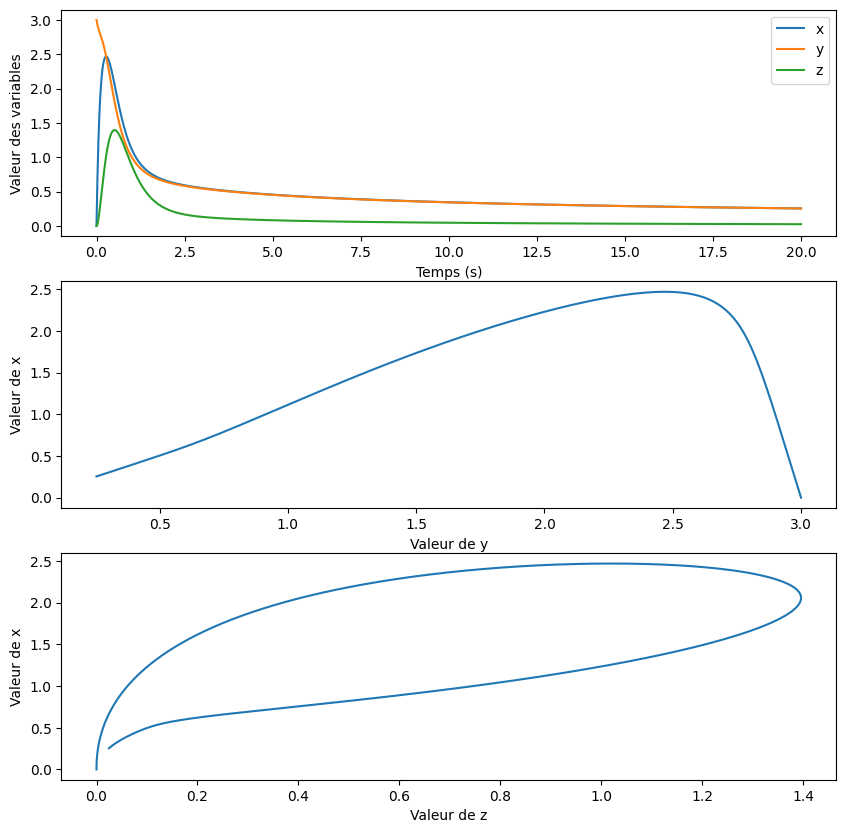

In [239]:
#1.1 solution stationnaire
t, x, y, z = euler(n = 2 * 10 ** 4, rho = 1, xt0_CI=0, yt0_CI = 3)
fig = graph_controle(t, x, y, z)
fig.savefig("graph_stationnaire.png", dpi=300)

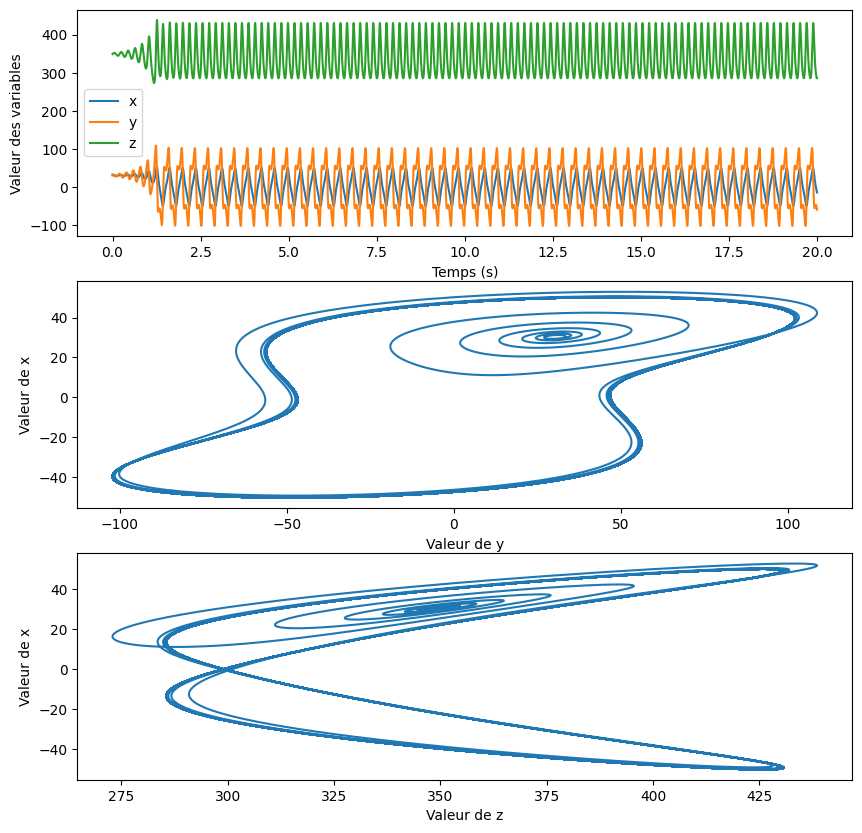

In [240]:
#1.2 solution périodique
t, x, y, z = euler(n = 2 * 10 ** 4, rho = 350.0, xt0_CI=0, yt0_CI = 3)
fig = graph_controle(t, x, y, z)
fig.savefig("graph_periodique.png", dpi=300)

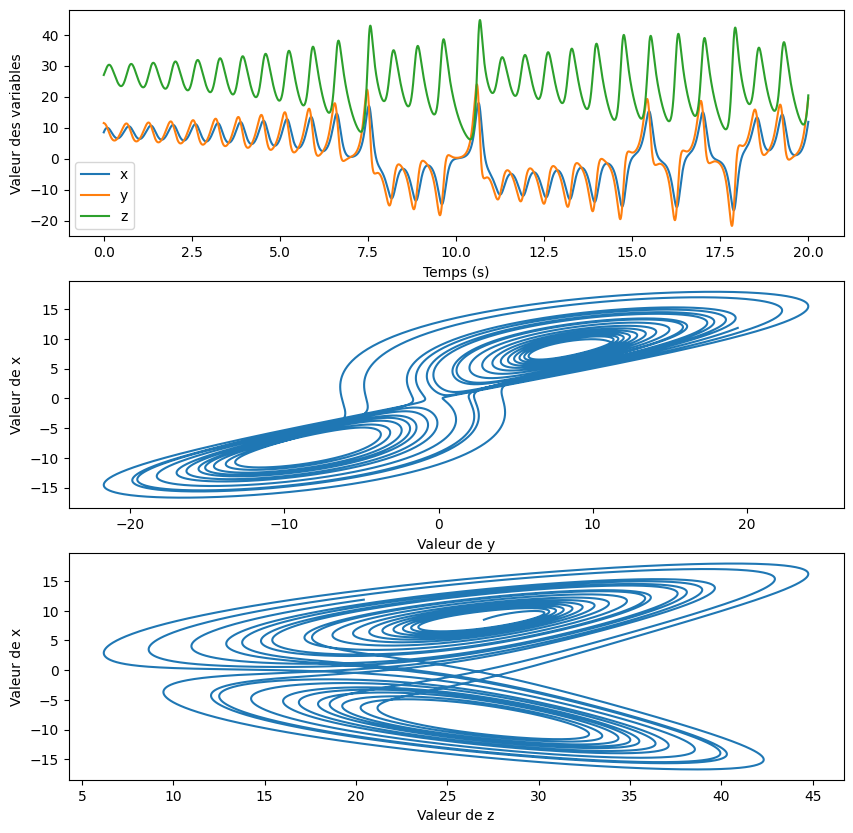

In [241]:
#1.3 solution chaotique
t, x, y, z = euler(n = 2 * 10 ** 4, rho = 28.0, xt0_CI=0, yt0_CI = 3)
fig = graph_controle(t, x, y, z)
fig.savefig("graph_chaotique.png", dpi=300)

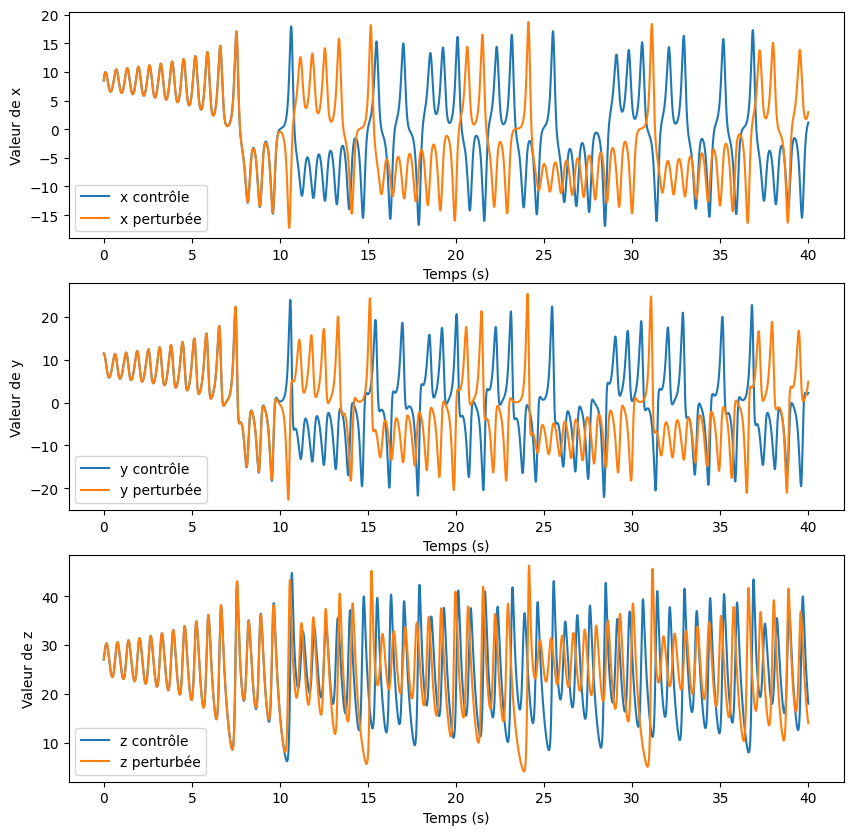

In [252]:
#2.1 graph contrôle vs perturbée
t1, x1, y1, z1 = euler(n = 4 * 10 ** 4, rho = 28.0 , xt0_CI=0, yt0_CI = 3)
t2, x2, y2, z2 = euler(n = 4 * 10 ** 4, epsilon = 0.01, xt0_CI=0, yt0_CI=3, rho = 28.0)
fig = graph_perturbee(t1, x1, y1, z1, x2, y2, z2)
fig.savefig("graph_controle_perturbee.png", dpi=300)

In [253]:
#écart type
ecart_x = np.std(x1)
ecart_y = np.std(y1)
ecart_z = np.std(z1)

#fonction qui trouve t_prev
def t_prev(t1, x1, x2):
    for temps, x_perturbe, x_controle in zip(t1, x1, x2):
        if abs(x_perturbe - x_controle) > ecart_x :
            return temps

print(t_prev(t1, x1, x2))

10.363


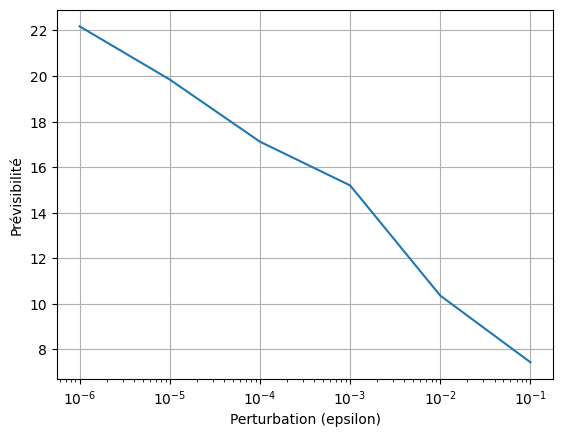

In [286]:
#prévisibilité #2.2
#fonction qui trouve le t_prev pour chaque epsilon
def previsibilite(t, x, epsi):
    temps_prev = np.empty(len(epsi))
    i=0
    for e in epsi:
        t2, x2, y2, z2 = euler(n = 4 * 10 ** 4 ,epsilon = e, xt0_CI=0, yt0_CI=3, rho = 28.0)
        temps_prev[i] = t_prev(t, x, x2)
        i = i + 1
    return temps_prev, epsi

temps_prev, epsilon = previsibilite(t1, x1, epsi = (0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1))

fig, ax = plt.subplots()
ax.semilogx(epsilon, temps_prev)
ax.set_xlabel('Perturbation (epsilon)')
ax.set_ylabel('Prévisibilité')
plt.grid()
fig.savefig("previsibilite_perturbation.png", dpi=300)
plt.show()

In [304]:
#previsibilité selon le régime de temps #2.3
#
#
# Le code fonctionnait auparavant, alors la figure se trouve bien dans le rapport. J'ai changé quelque chose par la suite qui fait que cette partie du code ne fonctionne plus. Je n'ai pas eu le temps de le réparer. Le reste du code fonctionne quand-même.
#
#
t1, x1, y1, z1 = euler(n = 4 * 10 ** 4, rho = 28.0 , xt0_CI=0, yt0_CI = 3)
eta = np.sqrt(8/3 * (28-1))

couples_prev_CI = {}
for xt0_CI, yt0_CI in zip((-2, -4, -6, -8), (1, -1, -3, -5)):

    t, x, y, z = euler(n = 4*10**4, xt0_CI=xt0_CI, yt0_CI=yt0_CI, rho = 28.0, epsilon = (0.01, 0.01, 0.01, 0.01))
    tp, eps = previsibilite(t, x1, epsi = epsilon)
    couples_prev_CI[eta + xt0_CI] = tp

previ = couples_prev_CI[eta + xt0_CI]
print(previ)
print(couples_prev_CI.keys())

fig, ax = plt.subplots()
ax.plot(couples_prev_CI.keys(), previ)
ax.set_xlabel('Valeur de la condition initiale de x')
ax.set_ylabel('Prévisibilité')
plt.grid()
fig.savefig("previsibilite_x.png", dpi=300)
plt.show()

ValueError: setting an array element with a sequence.

In [305]:
##partie 3 simulation controle et perturbee
t, x, y, z = euler(n=10**5, sigma = 10, rho = 28.0, epsilon = 0, xt0_CI=0, yt0_CI = 3)
t2, x2, y2, z2 = euler(n=10**5, sigma = 10, rho = 28.0, epsilon = 0.01, xt0_CI=0, yt0_CI = 3)

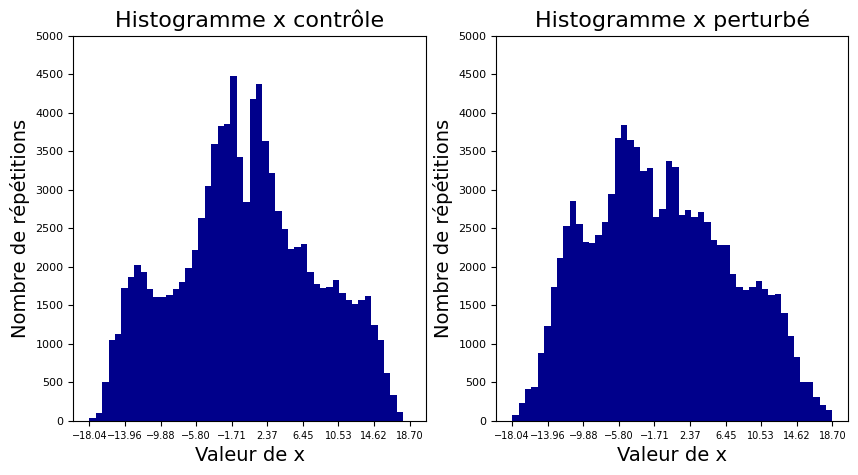

In [306]:
#histogramme x (3.1)
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.hist(x, bins=50, range=(np.min(x2), np.max(x2)), color = "darkblue", histtype="stepfilled")
plt.title("Histogramme x contrôle", fontsize=16)
plt.xlabel("Valeur de x", fontsize=14)
plt.xticks(np.linspace(np.min(x2), np.max(x2), 10), fontsize=7)
plt.ylabel("Nombre de répétitions", fontsize=14)
plt.yticks(np.linspace(0,5000,11), fontsize=8)

plt.subplot(1,2,2)
plt.hist(x2, bins=50, range=(np.min(x2), np.max(x2)), color = "darkblue", histtype="stepfilled")
plt.title("Histogramme x perturbé", fontsize=16)
plt.xlabel("Valeur de x", fontsize=14)
plt.xticks(np.linspace(np.min(x2), np.max(x2), 10), fontsize=7)
plt.ylabel("Nombre de répétitions", fontsize=14)
plt.yticks(np.linspace(0,5000,11), fontsize=8)

plt.savefig("histogramme_x.png", dpi=300, bbox_inches="tight")

plt.show()

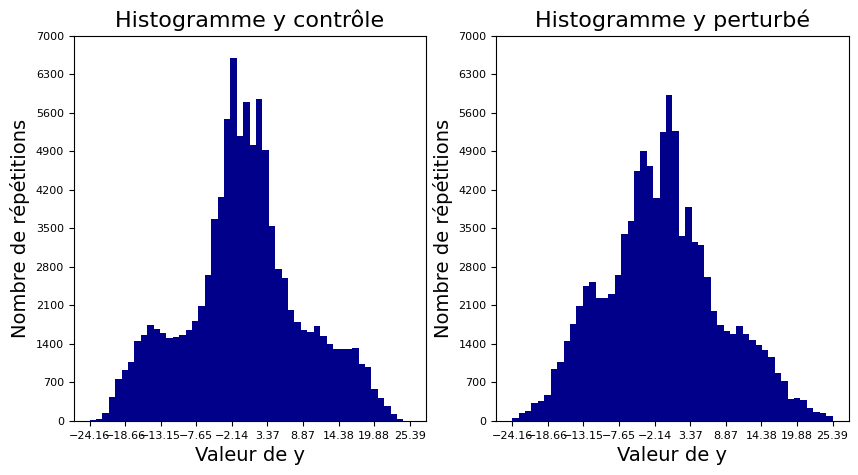

In [307]:
#histogramme y (3.1)
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.hist(y, bins=50, range=(np.min(y2), np.max(y2)), color = "darkblue", histtype="stepfilled")
plt.title("Histogramme y contrôle", fontsize=16)
plt.xlabel("Valeur de y", fontsize=14)
plt.xticks(np.linspace(np.min(y2), np.max(y2), 10), fontsize=8)
plt.ylabel("Nombre de répétitions", fontsize=14)
plt.yticks(np.linspace(0,7000,11), fontsize=8)

plt.subplot(1,2,2)
plt.hist(y2, bins=50, range=(np.min(y2), np.max(y2)), color = "darkblue", histtype="stepfilled")
plt.title("Histogramme y perturbé", fontsize=16)
plt.xlabel("Valeur de y", fontsize=14)
plt.xticks(np.linspace(np.min(y2), np.max(y2), 10), fontsize=8)
plt.ylabel("Nombre de répétitions", fontsize=14)
plt.yticks(np.linspace(0,7000,11), fontsize=8)

plt.savefig("histogramme_y.png", dpi=300, bbox_inches="tight")

plt.show()

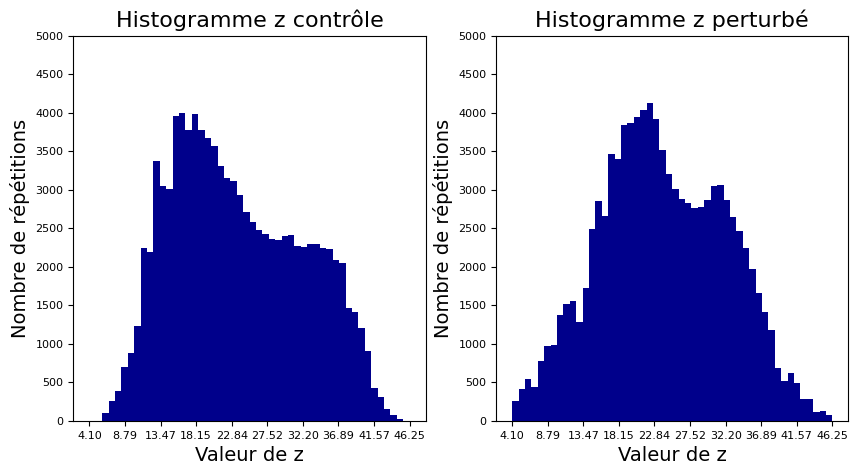

In [308]:
#histogramme z (3.1)
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.hist(z, bins=50, range=(np.min(z2), np.max(z2)), color = "darkblue", histtype="stepfilled")
plt.title("Histogramme z contrôle", fontsize=16)
plt.xlabel("Valeur de z" , fontsize=14)
plt.xticks(np.linspace(np.min(z2), np.max(z2), 10), fontsize=8)
plt.ylabel("Nombre de répétitions", fontsize=14)
plt.yticks(np.linspace(0,5000,11), fontsize=8)

plt.subplot(1,2,2)
plt.hist(z2, bins=50, range=(np.min(z2), np.max(z2)), color = "darkblue", histtype="stepfilled")
plt.title("Histogramme z perturbé", fontsize=16)
plt.xlabel("Valeur de z", fontsize=14)
plt.xticks(np.linspace(np.min(z2), np.max(z2), 10), fontsize=8)
plt.ylabel("Nombre de répétitions", fontsize=14)
plt.yticks(np.linspace(0,5000,11), fontsize=8)

plt.savefig("histogramme_z.png", dpi=300, bbox_inches="tight")

plt.show()

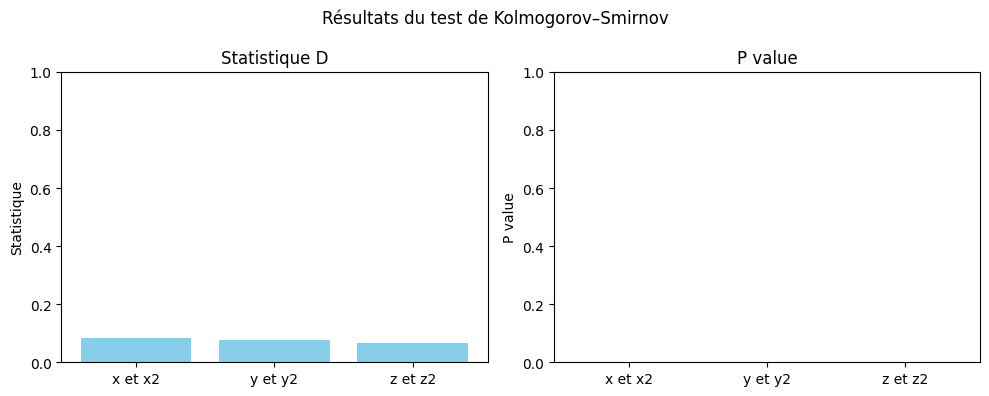

In [309]:
#test statistique (3.2)
stat_x = scipy.stats.ks_2samp(x, x2)
stat_y = scipy.stats.ks_2samp(y, y2)
stat_z = scipy.stats.ks_2samp(z, z2)

paires = ['x et x2', 'y et y2', 'z et z2']
stats = [stat_x.statistic, stat_y.statistic, stat_z.statistic]
pvals = [stat_x.pvalue, stat_y.pvalue, stat_z.pvalue]

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.bar(paires, stats, color='skyblue')
plt.title("Statistique D")
plt.ylabel("Statistique")
plt.ylim(0, 1)

plt.subplot(1, 2, 2)
plt.bar(paires, pvals, color='salmon')
plt.title("P value")
plt.ylabel("P value")
plt.ylim(0, 1)


plt.suptitle("Résultats du test de Kolmogorov–Smirnov")
plt.tight_layout()
plt.savefig("kolmogorov.png", dpi=300)


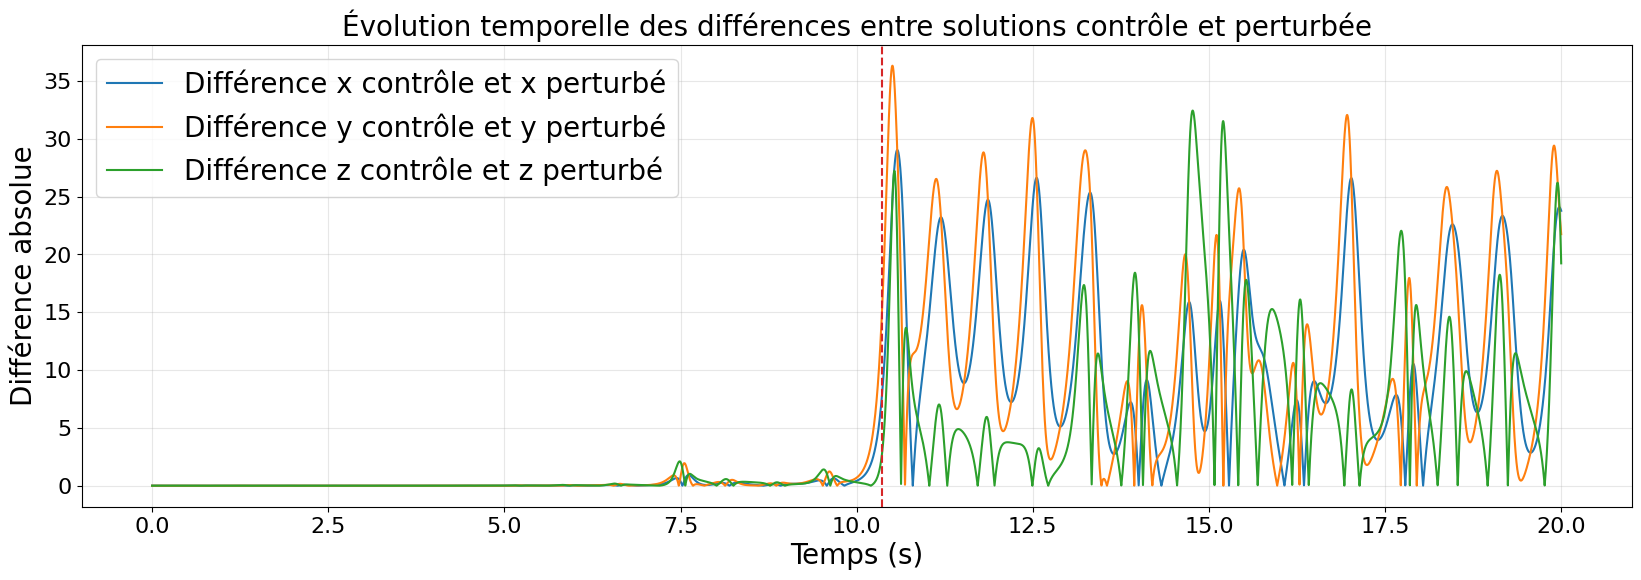

In [310]:
#figure bonus
t, x, y, z = euler(n=2*10**4, sigma = 10, rho = 28.0, epsilon = 0, xt0_CI=0, yt0_CI = 3)
t2, x2, y2, z2 = euler(n=2*10**4, sigma = 10, rho = 28.0, epsilon = 0.01, xt0_CI=0, yt0_CI = 3)

tprev = t_prev(t1, x, x2)

#différences entre controle et perturbé
dx = np.abs(x - x2)
dy = np.abs(y - y2)
dz = np.abs(z - z2)


plt.figure(figsize=(20, 6))

plt.plot(t, dx, label="Différence x contrôle et x perturbé", color='tab:blue')
plt.plot(t, dy, label="Différence y contrôle et y perturbé", color='tab:orange')
plt.plot(t, dz, label='Différence z contrôle et z perturbé', color='tab:green')
plt.axvline(tprev, linestyle='--', color='tab:red')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Temps (s)", fontsize=20)
plt.ylabel("Différence absolue", fontsize=20)
plt.title("Évolution temporelle des différences entre solutions contrôle et perturbée", fontsize=20)
plt.legend(fontsize = 20)
plt.grid(True, alpha=0.3)

plt.savefig("differences_temp.png", dpi=300)